<a href="https://colab.research.google.com/github/yuva24/loan-decision-system/blob/main/Loan_Decision_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intelligent Decision-Making for Loan Application

# Import packages

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import preprocessing, datasets
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from math import sqrt
import streamlit as st 


df = pd.read_csv("Bank_CS.csv")


# Exploratory Data Analysis and Data Pre-Processing

## Understanding the Data

In [ ]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,0,0,1,employer,NaN,16.0,yes,platinum,2,5.0,...,1,condominium,10.0,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,1,1,employer,605505.0,19.0,no,normal,2,NaN,...,2,NaN,10.0,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,2,2,1,employer,NaN,NaN,yes,normal,2,5.0,...,3,condominium,10.0,Johor,NaN,4919.0,540489.0,12613.0,Reject,8
3,3,3,1,employer,490216.0,NaN,no,normal,2,5.0,...,1,condominium,10.0,Johor,NaN,4459.0,536727.0,10952.0,Accept,9
4,4,4,1,employer,292728.0,14.0,yes,normal,2,5.0,...,2,condominium,10.0,Johor,3.0,5628.0,774695.0,NaN,Reject,8
5,5,5,1,employer,198118.0,NaN,no,normal,2,5.0,...,2,condominium,NaN,Johor,2.0,11323.0,1350187.0,16349.0,Reject,7
6,6,6,1,employer,226681.0,NaN,yes,gold,2,5.0,...,1,condominium,10.0,Johor,NaN,NaN,615986.0,11172.0,Accept,7
7,7,7,1,employer,667042.0,21.0,no,normal,2,5.0,...,2,condominium,10.0,Johor,NaN,NaN,NaN,7543.0,Reject,8
8,8,8,1,employer,114428.0,24.0,yes,normal,2,5.0,...,2,condominium,10.0,Johor,NaN,11983.0,556822.0,12947.0,Accept,8
9,9,9,1,employer,NaN,12.0,no,gold,2,5.0,...,1,condominium,10.0,Johor,2.0,NaN,1155848.0,18385.0,Reject,7


In [ ]:

print("Dataset shape:",df.shape)


Dataset shape: (2350, 23)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
Unnamed: 0                           2350 non-null int64
Unnamed: 0.1                         2350 non-null int64
Credit_Card_Exceed_Months            2350 non-null int64
Employment_Type                      2350 non-null object
Loan_Amount                          1818 non-null float64
Loan_Tenure_Year                     1898 non-null float64
More_Than_One_Products               2350 non-null object
Credit_Card_types                    2208 non-null object
Number_of_Dependents                 2350 non-null int64
Years_to_Financial_Freedom           1703 non-null float64
Number_of_Credit_Card_Facility       1709 non-null float64
Number_of_Properties                 1525 non-null float64
Number_of_Bank_Products              1615 non-null float64
Number_of_Loan_to_Approve            2350 non-null int64
Property_Type                        2156 non-null object
Years_for_Property_to_

#### By looking at this information we can observe that ***:***
- There are missing values in Loan_Amount, Loan_Tenure_Year, Years_to_Financial_Freedom, Number_of_Credit_Card_Facility, Number_of_Properties, Number_of_Bank_Products, Years_for_Property_to_Completion, Number_of_Side_Income, Monthly_Salary, Total_Sum_of_Loan and Total_Income_for_Join_Application
                                                   
#### We can also group the columns by referring to the information above
The columns are classified as Categorical, Ordinal and Continuous (numerical).    

*   **Categorical** - Employment_Type, More_Than_One_Products, Property_Type, State, Decision                         
*   **Ordinal** - Credit_Card_types
*   **Continuous** - Credit_Card_Exceed_Months, Loan_Amount, Loan_Tenure_Year, Number_of_Dependent, Years_to_Financial_Freedom, Number_of_Credit_Card_Facility, Number_of_Properties, Number_of_Bank_Products, Number_of_Loan_to_Approve, Years_for_Property_to_Completion, Number_of_Side_Income, Monthly_Salary, Total_Income_for_Join_Application, Score                                                         



In [ ]:
print("Duplicated records in dataset:" , df.duplicated().sum())

Duplicated records in dataset: 0


- No duplication of data in the dataset

2020-09-20 22:15:27.186 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


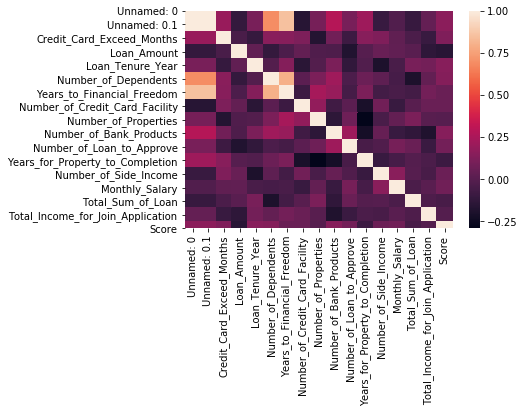

In [ ]:
df_na = df.dropna()
corr=df_na.corr()
sns.heatmap(corr)

#### Looking at the heatmap, we can see that there are some correlation between
- Years_to_Financial_Freedom and Number_of_Dependents
- Number_of_Properties and Number_of_Dependents
- Number_of_Bank_Products and Years_to_Financial_Freedom
- Number_of_Credit_Card_Facility and Number_of_Properties
- Years_for_Property_to_Completion and Credit_Card_Exceed_Months        

### Fixing column and rows 

In [ ]:
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,NaN,16.0,yes,platinum,2,5.0,2.0,2.0,...,1,condominium,10.0,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,employer,605505.0,19.0,no,normal,2,NaN,2.0,2.0,...,2,NaN,10.0,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,1,employer,NaN,NaN,yes,normal,2,5.0,2.0,2.0,...,3,condominium,10.0,Johor,NaN,4919.0,540489.0,12613.0,Reject,8
3,1,employer,490216.0,NaN,no,normal,2,5.0,NaN,2.0,...,1,condominium,10.0,Johor,NaN,4459.0,536727.0,10952.0,Accept,9
4,1,employer,292728.0,14.0,yes,normal,2,5.0,2.0,2.0,...,2,condominium,10.0,Johor,3.0,5628.0,774695.0,NaN,Reject,8


- Unnamed:0.1 and Unnamed:0 has been dropped from the dataframe as it has no predicting power.


In [ ]:
df.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,NaN,16.0,yes,platinum,2,5.0,2.0,2.0,...,1,condominium,10.0,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,employer,605505.0,19.0,no,normal,2,NaN,2.0,2.0,...,2,NaN,10.0,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,1,employer,NaN,NaN,yes,normal,2,5.0,2.0,2.0,...,3,condominium,10.0,Johor,NaN,4919.0,540489.0,12613.0,Reject,8
3,1,employer,490216.0,NaN,no,normal,2,5.0,NaN,2.0,...,1,condominium,10.0,Johor,NaN,4459.0,536727.0,10952.0,Accept,9
4,1,employer,292728.0,14.0,yes,normal,2,5.0,2.0,2.0,...,2,condominium,10.0,Johor,3.0,5628.0,774695.0,NaN,Reject,8


- The Unnamed: 0 and Unnamed: 0.1 column in our dataset is dropped as it is redundant.

## Correcting Spelling Mistakes

In [ ]:
df['State'].value_counts()

Kuala Lumpur    850
Johor           360
Selangor        320
Penang          200
P.Pinang        180
Pulau Penang     80
Johor B          80
K.L              80
N.Sembilan       60
N.S              40
Sabah            20
Kedah            20
SWK              20
Trengganu        20
Sarawak          20
Name: State, dtype: int64

In [ ]:
def clean_state(item):
    place = str(item['State'])
    
    if 'P.Pinang' in place:
        return 'Penang'
    if 'Pulau Penang' in place:
        return 'Penang'
    if 'K.L' in place:
        return 'Kuala Lumpur'
    if 'Trengganu' in place:
        return 'Terengganu'
    if 'SWK' in place:
        return 'Sarawak'
    if 'N.S' in place:
        return 'N.Sembilan'
    if place == 'Johor B':
        return 'Johor'
    
    return place
    
df['State'] = df.apply(clean_state, axis = 1)


In [ ]:
df['State'].value_counts()

Kuala Lumpur    930
Penang          460
Johor           440
Selangor        320
N.Sembilan      100
Sarawak          40
Sabah            20
Kedah            20
Terengganu       20
Name: State, dtype: int64

## Handling Missing Values

In [ ]:
col_missing_perc = round(100*(df.isnull().sum()/len(df.index)), 2)
print(col_missing_perc)

Credit_Card_Exceed_Months             0.00
Employment_Type                       0.00
Loan_Amount                          22.64
Loan_Tenure_Year                     19.23
More_Than_One_Products                0.00
Credit_Card_types                     6.04
Number_of_Dependents                  0.00
Years_to_Financial_Freedom           27.53
Number_of_Credit_Card_Facility       27.28
Number_of_Properties                 35.11
Number_of_Bank_Products              31.28
Number_of_Loan_to_Approve             0.00
Property_Type                         8.26
Years_for_Property_to_Completion     18.30
State                                 0.00
Number_of_Side_Income                31.11
Monthly_Salary                       22.68
Total_Sum_of_Loan                    12.00
Total_Income_for_Join_Application    39.15
Decision                              0.00
Score                                 0.00
dtype: float64


In [ ]:
df.describe()

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Score
count,2350.000000,1818.000000,1898.000000,2350.00000,1703.000000,1709.000000,1525.000000,1615.000000,2350.000000,1920.000000,1619.000000,1817.000000,2.068000e+03,1430.000000,2350.000000
mean,4.723404,443086.929043,17.056375,3.12766,13.372871,3.737273,2.382951,2.104025,1.991915,10.658333,2.020383,8001.264722,9.456851e+05,13698.553147,7.496596
std,2.101127,202364.762770,4.340597,1.40874,4.082739,1.375819,0.813420,1.537738,0.816717,1.072628,0.820145,2605.084675,2.932010e+05,3630.290425,1.112542
min,1.000000,100194.000000,10.000000,2.00000,5.000000,2.000000,2.000000,1.000000,1.000000,10.000000,1.000000,3583.000000,4.202390e+05,7523.000000,6.000000
25%,3.000000,265953.500000,13.000000,2.00000,10.000000,2.000000,2.000000,1.000000,1.000000,10.000000,1.000000,5723.000000,6.993572e+05,10655.000000,6.000000
50%,5.000000,444235.000000,17.000000,2.00000,14.000000,4.000000,2.000000,1.000000,2.000000,10.000000,2.000000,7992.000000,9.451400e+05,13607.000000,8.000000
75%,7.000000,613354.750000,21.000000,4.00000,17.000000,4.000000,2.000000,3.000000,3.000000,11.000000,3.000000,10307.000000,1.201313e+06,16821.750000,8.000000
max,7.000000,799628.000000,24.000000,6.00000,19.000000,6.000000,5.000000,5.000000,3.000000,13.000000,3.000000,12562.000000,1.449960e+06,19995.000000,9.000000


### Missing Values in Numerical Data

In [ ]:
df.loc[np.isnan(df['Loan_Amount']), ['Loan_Amount']] = df['Loan_Amount'].mean()
df['Loan_Amount']= df['Loan_Amount']

df.loc[np.isnan(df['Monthly_Salary']), ['Monthly_Salary']] = df['Monthly_Salary'].mean()
df['Monthly_Salary']= df['Monthly_Salary']

df.loc[np.isnan(df['Total_Sum_of_Loan']), ['Total_Sum_of_Loan']] = df['Total_Sum_of_Loan'].mean()
df['Total_Sum_of_Loan']= df['Total_Sum_of_Loan']


df.loc[np.isnan(df['Loan_Tenure_Year']), ['Loan_Tenure_Year']] = df['Loan_Tenure_Year'].mean()
df['Loan_Tenure_Year']= (df['Loan_Tenure_Year'])

df.loc[np.isnan(df['Years_to_Financial_Freedom']), ['Years_to_Financial_Freedom']] = df['Years_to_Financial_Freedom'].mean()
df['Years_to_Financial_Freedom']= (df['Years_to_Financial_Freedom'])

df.loc[np.isnan(df['Number_of_Credit_Card_Facility']), ['Number_of_Credit_Card_Facility']] = df['Number_of_Credit_Card_Facility'].mean()
df['Number_of_Credit_Card_Facility']= (df['Number_of_Credit_Card_Facility'])

df.loc[np.isnan(df['Number_of_Properties']), ['Number_of_Properties']] = df['Number_of_Properties'].mean()
df['Number_of_Properties']= (df['Number_of_Properties'])

df.loc[np.isnan(df['Years_for_Property_to_Completion']), ['Years_for_Property_to_Completion']] = df['Years_for_Property_to_Completion'].mean()
df['Years_for_Property_to_Completion']= (df['Years_for_Property_to_Completion'])

df.loc[np.isnan(df['Number_of_Bank_Products']), ['Number_of_Bank_Products']] = df['Number_of_Bank_Products'].mean()
df['Number_of_Bank_Products']= (df['Number_of_Bank_Products'])

df.loc[np.isnan(df['Number_of_Side_Income']), ['Number_of_Side_Income']] = df['Number_of_Side_Income'].mean()
df['Number_of_Side_Income']= (df['Number_of_Side_Income'])

df.loc[np.isnan(df['Total_Income_for_Join_Application']), ['Total_Income_for_Join_Application']] = df['Total_Income_for_Join_Application'].mean()
df['Total_Income_for_Join_Application']= df['Total_Income_for_Join_Application']


df.loc[np.isnan(df['Loan_Tenure_Year']),['Loan_Tenure_Year']]=(df['Loan_Tenure_Year'].mean())



- Missing values of the columns above underwent data imputation using mean, as the median and mean is very similar in value based on the above table.



### Missing Values in Categorical Data

In [ ]:
df['Credit_Card_types'].value_counts(normalize=True, dropna=False)

normal      0.572766
gold        0.277447
platinum    0.089362
NaN         0.060426
Name: Credit_Card_types, dtype: float64

In [ ]:
df['Property_Type'].value_counts(normalize=True, dropna=False)

condominium    0.344681
terrace        0.222128
flat           0.177021
bungalow       0.173617
NaN            0.082553
Name: Property_Type, dtype: float64

In [ ]:
df['Property_Type']=np.where(df['Property_Type'].isnull(),df['Property_Type'].mode(),df['Property_Type']) 
df['Credit_Card_types']=np.where(df['Credit_Card_types'].isnull(),df['Credit_Card_types'].mode(),df['Credit_Card_types']) 


- 57% of Credit Card Types are normal
- 34% of Property Types are condominium
- Mode has been used to impute the missing data of Property_Type column and Credit_Card_types column as mode represents the most frequent category.

In [ ]:
df['Credit_Card_types'].value_counts(normalize=True, dropna=False)

normal      0.633191
gold        0.277447
platinum    0.089362
Name: Credit_Card_types, dtype: float64

In [ ]:
df['Property_Type'].value_counts(normalize=True, dropna=False)

condominium    0.427234
terrace        0.222128
flat           0.177021
bungalow       0.173617
Name: Property_Type, dtype: float64

## Visualizing the Data

### Visualizing the Credit Score Data against other Features

In [ ]:
# Number of Applicants by Credit Score
temp1 = df['Score'].value_counts(ascending = True, normalize = True)      

# Probability of receiving a Loan by credit history
temp2 = pd.crosstab(df['Score'], df['Decision'],normalize = 'index')

# Probability of credit_history by Loan_Status
temp2b = pd.crosstab(df['Decision'],df['Score'],normalize = 'index')

print ('Distribution of Applicants')
print (temp1)

print ('Probability of Loan by Credit Score')
print (temp2)

print ('Probability of Credit Score by Loan')
print (temp2b)

Distribution of Applicants
9    0.242979
7    0.245106
6    0.250638
8    0.261277
Name: Score, dtype: float64
Probability of Loan by Credit Score
Decision    Accept    Reject
Score                       
6         0.748727  0.251273
7         0.755208  0.244792
8         0.758958  0.241042
9         0.747811  0.252189
Probability of Credit Score by Loan
Score            6         7         8         9
Decision                                        
Accept    0.249293  0.245902  0.263426  0.241379
Reject    0.254733  0.242685  0.254733  0.247849


#### Visualising the above tables

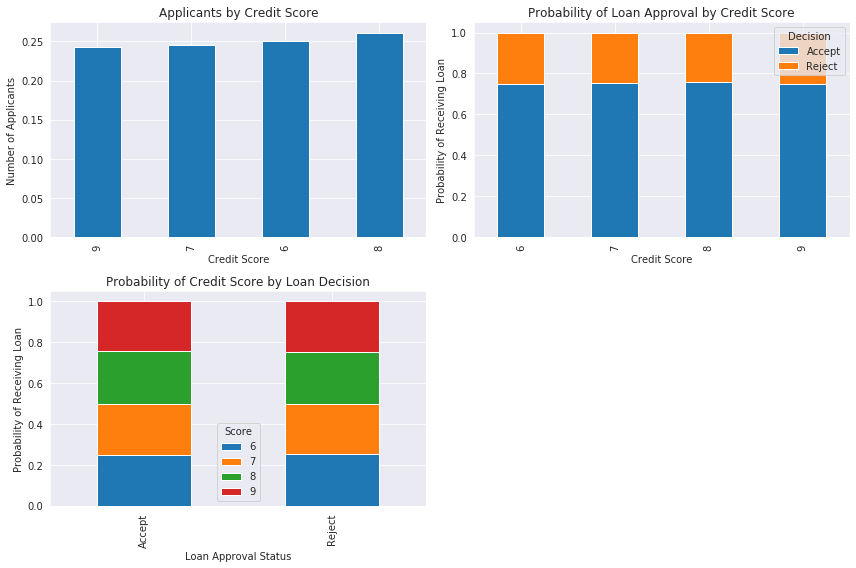

In [ ]:
 #PLOT 1: Number of Applicants grouped by Credit Score
with sns.axes_style('darkgrid'):    
    fig = plt.figure(figsize = (12,8))  
    ax1 = fig.add_subplot(221)         
    temp1.plot(kind = 'bar', ax = ax1)
    ax1.set_xlabel('Credit Score')      
    ax1.set_ylabel('Number of Applicants')
    ax1.set_title('Applicants by Credit Score')

#PLOT 2: Probability of receiving Loan by Credit Score
with sns.axes_style('darkgrid'):
    ax2 = fig.add_subplot(222)  
    temp2.plot(kind = "bar", stacked = True, ax = ax2) 
    ax2.set_xlabel('Credit Score') 
    ax2.set_ylabel('Probability of Receiving Loan')
    ax2.set_title('Probability of Loan Approval by Credit Score')
    
#PlOT 3: Probability of Credit Score by Loan Status
with sns.axes_style('darkgrid'):
    ax3 = fig.add_subplot(223)  
    temp2b.plot(kind = "bar", stacked = True, ax = ax3) 
    ax3.set_xlabel('Loan Approval Status') 
    ax3.set_ylabel('Probability of Receiving Loan')
    ax3.set_title('Probability of Credit Score by Loan Decision')

plt.tight_layout()

### Visualizing Loan Decision data against other Features

Decision           Accept    Reject
Employment_Type                    
Fresh_Graduate   0.741818  0.258182
Self_Employed    0.730000  0.270000
employee         0.761667  0.238333
employer         0.735000  0.265000
government       0.797500  0.202500


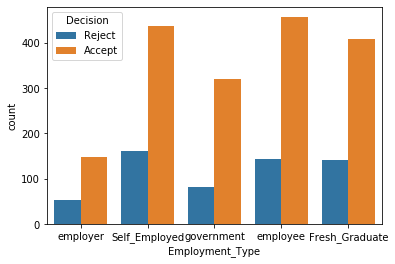

In [ ]:
print
temp3 = pd.crosstab(index = df['Employment_Type'],columns = df['Decision'],normalize = 'index')
print (temp3)

sns.countplot(x="Employment_Type", hue='Decision', data=df)


Decision         Accept    Reject
Property_Type                    
bungalow       0.754902  0.245098
condominium    0.753984  0.246016
flat           0.718750  0.281250
terrace        0.775862  0.224138
Decision             Accept    Reject
Credit_Card_types                    
gold               0.740798  0.259202
normal             0.749328  0.250672
platinum           0.814286  0.185714


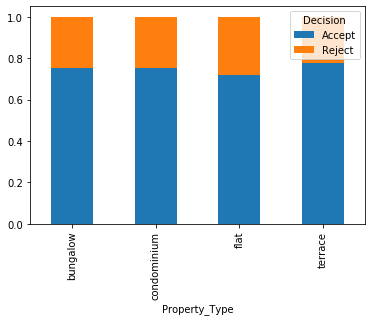

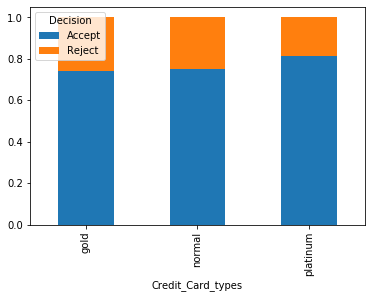

In [ ]:

print
temp4 = pd.crosstab(index = df['Property_Type'],columns = df['Decision'],normalize = 'index')
print (temp4)


print
temp4b = pd.crosstab(index = df['Credit_Card_types'],columns = df['Decision'],normalize = 'index')
print (temp4b)


# Probability of Loan Approval and Rejection by Property Type
temp4.plot(kind = 'bar', stacked = True)
plt.show()

# Loan Approval and Rejection by Credit Card type

temp4b.plot(kind = 'bar', stacked = True)
plt.show()

### Visualizing Income data against other Features

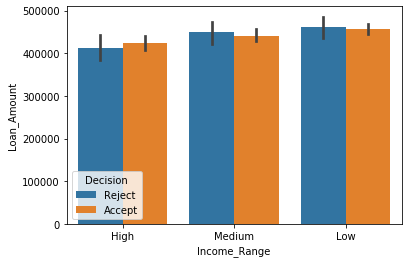

In [ ]:
monthly_salary_quantile = list(df['Monthly_Salary'].quantile([0.25,0.5,0.75]))

def salary_group(x):
    if x>=monthly_salary_quantile[2]:
        return "High"
    elif x>=monthly_salary_quantile[1]:
        return "Medium"
    else:
        return "Low"
df['Income_Range'] = df['Monthly_Salary'].apply(lambda x: salary_group(x))

sns.barplot(x='Income_Range',y="Loan_Amount", hue='Decision',data=df)
df2=df.copy()


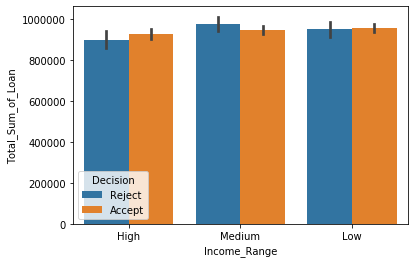

In [ ]:
sns.barplot(x='Income_Range',y="Total_Sum_of_Loan", hue='Decision',data=df)


## Association Rule Mining

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori


In [ ]:
bank_data = df[['Employment_Type', 'Credit_Card_types', 'Income_Range','More_Than_One_Products']].copy()
bank_data.head()

,Employment_Type,Credit_Card_types,Income_Range,More_Than_One_Products
0,employer,platinum,High,yes
1,employer,normal,Medium,no
2,employer,normal,Low,yes
3,employer,normal,Low,no
4,employer,normal,Low,yes


In [ ]:
bank_data.rename(columns=df.iloc[0]).drop(df.index[0])


,employer,platinum,High,yes
1,employer,normal,Medium,no
2,employer,normal,Low,yes
3,employer,normal,Low,no
4,employer,normal,Low,yes
5,employer,normal,High,no
...,...,...,...,...
2345,Fresh_Graduate,platinum,High,no
2346,Fresh_Graduate,normal,High,yes
2347,Fresh_Graduate,normal,Medium,no
2348,Fresh_Graduate,normal,Low,yes


In [ ]:
records = []
for i in range(0, 2349):
    records.append([str(bank_data.values[i,j]) for j in range(0, 4)])

In [ ]:
association_rules = apriori(records, min_support=0.01, min_confidence=0.01, min_lift=1.1, min_length=2)
association_results = list(association_rules)

In [ ]:
len(association_results)

53

In [ ]:
results = []
for item in association_results:
    
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    
    value0 = str(items[0])
    value1 = str(items[1])

    #second index of the inner list
    value2 = str(item[1])[:7]

    #third index of the list located at 0th
    #of the third index of the inner list

    value3 = str(item[2][0][2])[:7]
    value4 = str(item[2][0][3])[:7]
    
    rows = (value0, value1,value2,value3,value4)
    results.append(rows)
    
labels = ['Feature 1','Feature 2','Support','Confidence','Lift']
bank_suggestion = pd.DataFrame.from_records(results, columns = labels)

print(bank_suggestion)

        Feature 1       Feature 2  Support Confidence     Lift
0   Self_Employed            High  0.07066    0.28279  1.10713
1            gold             Low  0.12175    0.31394  1.13279
2      government             Low  0.07364    0.18990  1.11519
3        employer          Medium  0.03746    0.10340  1.21452
4        platinum          Medium  0.03831    0.10575  1.18297
5        platinum   Self_Employed  0.02767    0.10833  1.21178
6              no            High  0.03235    0.12947  1.10996
7             Low            gold  0.02852    0.10291  1.14576
8            gold  Fresh_Graduate  0.02511    0.10746  1.14227
9            gold  Fresh_Graduate  0.03788    0.16211  1.15046
10             no        platinum  0.01234    0.02470  1.11585
11         normal   Self_Employed  0.04725    0.18909  1.20703
12  Self_Employed            High  0.03618    0.14480  1.13381
13       employer            High  0.01064    0.02127  1.11063
14           gold            High  0.03405    0.06814  

- The support value for the second rule is 0.12175. This number is calculated by dividing the number of low income range applicants divided by total number of applications. The confidence level for the rule is 0.31394 which shows that out of all the applicants with low income, around 31.4% of the them are using the Gold Credit Card. Finally, the lift of 1.13279 tells us that Gold Credit Card is 1.13279 times more likely to be owned by applicants with low income range compared to the default likelihood of the Gold Credit Card ownership.

# Feature Encoding

### One-Hot Encoding

One-Hot Encoding is used because the categories are unordered.They are also nominal data with less that 15 cardinality.

In [ ]:
# Create a list of features to dummy

df = pd.get_dummies(df,columns = ['Employment_Type','Property_Type','State','Credit_Card_types','More_Than_One_Products','Income_Range'],
              drop_first = True)

### Mapping

In [ ]:
df['Decision'] =df['Decision'].map({'Accept': 1, 'Reject': 0})


- Dummy based encoding is used for the following categories as they are nominal data with less than 15 cardinality

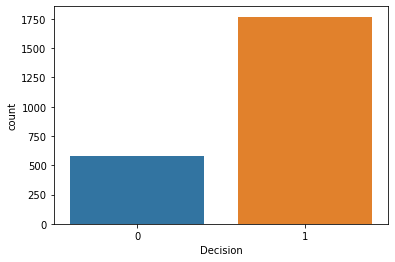

In [ ]:
sns.countplot(x='Decision', data=df)

# Feature Selection

## Boruta Feature Selection

- Boruta Feature Selection is used as it improved the accuracy of the prediction models compared to other methods like Univariate Selection. Boruto Algorithm helps in building predictive models free from correlated variables, biases and unwanted noise.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from boruta import boruta_py
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
newX = df.loc[:, df.columns != 'Decision']
newy = df.loc[:, df.columns == 'Decision']
colnames = newX.columns


In [ ]:
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced')
feat_selector = boruta_py.BorutaPy(forest, n_estimators='auto', verbose=2)
feat_selector.fit(newX.values, newy.values.ravel())


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	35
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	33
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	33
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	33
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	33
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	33
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	33
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	33
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	33
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	0
Rejected: 	35



BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=20, n_jobs=-1,
                                          random_state=<mtrand.RandomState object at 0x000001EAFA381C78>),
         n_estimators='auto',
         random_state=<mtrand.RandomState object at 0x000001EAFA381C78>,
         verbose=2)

In [ ]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score",ascending=False)
boruta_score

,Features,Score
12,Total_Sum_of_Loan,1.00
1,Loan_Amount,0.97
11,Monthly_Salary,0.94
13,Total_Income_for_Join_Application,0.91
2,Loan_Tenure_Year,0.88
4,Years_to_Financial_Freedom,0.85
0,Credit_Card_Exceed_Months,0.82
14,Score,0.79
5,Number_of_Credit_Card_Facility,0.79
10,Number_of_Side_Income,0.74


### The best 10 features is selected to use with our predictive model

In [ ]:
print(boruta_score.nlargest(10,'Score'))

                             Features  Score
12                  Total_Sum_of_Loan   1.00
1                         Loan_Amount   0.97
11                     Monthly_Salary   0.94
13  Total_Income_for_Join_Application   0.91
2                    Loan_Tenure_Year   0.88
4          Years_to_Financial_Freedom   0.85
0           Credit_Card_Exceed_Months   0.82
14                              Score   0.79
5      Number_of_Credit_Card_Facility   0.79
10              Number_of_Side_Income   0.74


# Machine Learning

## K-means Clustering

In [ ]:
df_new=df.copy()

In [ ]:
X = df.drop('Decision', axis=1)
y = df['Decision']

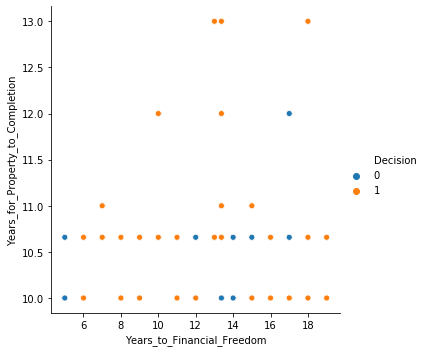

In [ ]:
ax=sns.relplot(x='Years_to_Financial_Freedom', y='Years_for_Property_to_Completion',hue="Decision",data=df)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=1)
y_predicted = km.fit_predict(df_new[['Years_to_Financial_Freedom','Years_for_Property_to_Completion']])
km.labels_

array([1, 2, 1, ..., 2, 2, 2])

In [ ]:
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k, init='random',n_init=10,max_iter=100, random_state=0 )
    km.fit(df_new[['Years_to_Financial_Freedom','Years_for_Property_to_Completion']])
    sse.append(km.inertia_)

- This loop is used to find the optimum K value by inspecting the location of the elbow criterion.

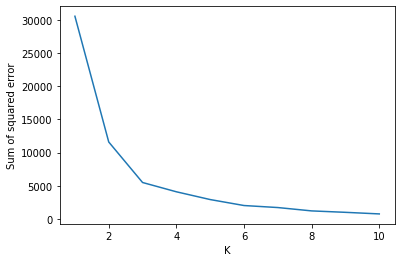

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

- From the above graph, using elbow method, we can see that the most optimum K is 3

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=1)
y_predicted = km.fit_predict(df_new[['Years_to_Financial_Freedom','Years_for_Property_to_Completion']])
km.labels_

array([1, 2, 1, ..., 2, 2, 2])

- K=3 is chosen to do carry out our Clustering

In [ ]:
df_new2=df_new.copy()
df_new2=df_new2.drop("Decision", axis=1)
df_new2['Decision']=km.labels_

In [ ]:
df_new2.head()

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,...,State_Sabah,State_Sarawak,State_Selangor,State_Terengganu,Credit_Card_types_normal,Credit_Card_types_platinum,More_Than_One_Products_yes,Income_Range_Low,Income_Range_Medium,Decision
0,1,443086.929043,16.000000,2,5.000000,2.000000,2.0,1.000000,1,10.0,...,0,0,0,0,0,1,1,0,0,1
1,1,605505.000000,19.000000,2,13.372871,2.000000,2.0,1.000000,2,10.0,...,0,0,0,0,1,0,0,0,1,2
2,1,443086.929043,17.056375,2,5.000000,2.000000,2.0,2.104025,3,10.0,...,0,0,0,0,1,0,1,1,0,1
3,1,490216.000000,17.056375,2,5.000000,3.737273,2.0,1.000000,1,10.0,...,0,0,0,0,1,0,0,1,0,1
4,1,292728.000000,14.000000,2,5.000000,2.000000,2.0,1.000000,2,10.0,...,0,0,0,0,1,0,1,1,0,1


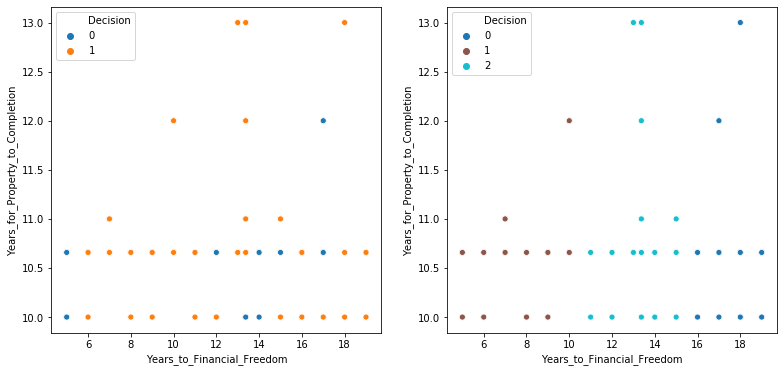

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13,6))

sns.scatterplot(x="Years_to_Financial_Freedom", y="Years_for_Property_to_Completion", hue="Decision", palette="tab10", data=df_new, ax=axes[0])
sns.scatterplot(x="Years_to_Financial_Freedom", y="Years_for_Property_to_Completion", hue="Decision", palette="tab10", data=df_new2, ax=axes[1])

- The figure on the left is before clustering, The figure on the right is after clustering.

## Predictive Algorithms

In [ ]:
df.head()

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,...,State_Penang,State_Sabah,State_Sarawak,State_Selangor,State_Terengganu,Credit_Card_types_normal,Credit_Card_types_platinum,More_Than_One_Products_yes,Income_Range_Low,Income_Range_Medium
0,1,443086.929043,16.000000,2,5.000000,2.000000,2.0,1.000000,1,10.0,...,0,0,0,0,0,0,1,1,0,0
1,1,605505.000000,19.000000,2,13.372871,2.000000,2.0,1.000000,2,10.0,...,0,0,0,0,0,1,0,0,0,1
2,1,443086.929043,17.056375,2,5.000000,2.000000,2.0,2.104025,3,10.0,...,0,0,0,0,0,1,0,1,1,0
3,1,490216.000000,17.056375,2,5.000000,3.737273,2.0,1.000000,1,10.0,...,0,0,0,0,0,1,0,0,1,0
4,1,292728.000000,14.000000,2,5.000000,2.000000,2.0,1.000000,2,10.0,...,0,0,0,0,0,1,0,1,1,0


In [ ]:
X = df[['Monthly_Salary','Total_Sum_of_Loan','Total_Income_for_Join_Application','Loan_Amount','Loan_Tenure_Year','Years_to_Financial_Freedom','Credit_Card_Exceed_Months','Number_of_Credit_Card_Facility','Score','Number_of_Side_Income']]
y = df['Decision']

y.value_counts(normalize='True')


1    0.752766
0    0.247234
Name: Decision, dtype: float64

- As the acceptance rate is very high compared to rejection rate ADASYN is applied to carry out oversampling.

### Over-Sampling

- Over-Sampling is done to balance the Decision data which is imbalanced

In [ ]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy='minority', random_state= 420 , n_neighbors = 5)
X, y = ada.fit_resample(X,y)
y.value_counts()


0    1829
1    1769
Name: Decision, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [ ]:
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    from sklearn.metrics import accuracy_score
    accuracy=(accuracy_score(y_test,y_pred)*100)
    print("Accuracy is", accuracy)

### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
model= XGBClassifier(random_state=4)
classify(model, X, y)

Accuracy is 79.11111111111111


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier(random_state=4)
classify(model, X, y)

Accuracy is 81.22222222222221


### Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=4)
classify(model, X, y)

Accuracy is 50.22222222222222


### k-NN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model =  KNeighborsClassifier()
classify(model, X, y)

Accuracy is 63.55555555555556


## Hyperparameter Tuning and Cross Validation

### XGBoost Classifier + GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier()
optimization_dict = {'max_depth': [2,4,6],
                      'n_estimators': [50,100,200],
                     'base_score': [0.5,0.7,0.9],
                     "random_state":[3]}

model = GridSearchCV(xgb_model, optimization_dict, 
                      scoring='accuracy', verbose=1,cv=5)
classify(model, X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   23.2s finished


Accuracy is 79.11111111111111


### Random Forest Classifier + GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
param_grid = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None],
    "random_state":[7]
}
model = GridSearchCV(rfc, param_grid, 
                      scoring='accuracy', verbose=1,cv=5)
classify(model, X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.0min finished


Accuracy is 80.66666666666666


### Linear Regression + GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

lr_model = LogisticRegression()
param_grid = {'tol': [0.01, 0.001, 0.0001],
                      'max_iter': [100, 150, 200]}

model = GridSearchCV(lr_model, param_grid, 
                      scoring='accuracy', verbose=1,cv=5)
classify(model, X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy is 50.22222222222222


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.5s finished


### k-NN Classification + GridSearchCV

In [ ]:
knn_model = KNeighborsClassifier()
param_grid = { 'n_neighbors': [3, 5, 7, 9, 11]}

model = GridSearchCV(knn_model, param_grid, 
                      scoring='accuracy', verbose=1,cv=5)
classify(model, X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy is 65.55555555555556


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.2s finished


## Findings and Results

### Analysis based on Credit Score

In [ ]:
# Number of Applicants by Credit Score
temp1 = df['Score'].value_counts(ascending = True, normalize = True)      

# Probability of receiving a Loan by credit history
temp2 = pd.crosstab(df['Score'], df['Decision'],normalize = 'index')

# Probability of credit_history by Loan_Status
temp2b = pd.crosstab(df['Decision'],df['Score'],normalize = 'index')

print ('Distribution of Applicants')
print (temp1)

print ('Probability of Loan by Credit Score')
print (temp2)

print ('Probability of Credit Score by Loan')
print (temp2b)

Distribution of Applicants
9    0.242979
7    0.245106
6    0.250638
8    0.261277
Name: Score, dtype: float64
Probability of Loan by Credit Score
Decision         0         1
Score                       
6         0.251273  0.748727
7         0.244792  0.755208
8         0.241042  0.758958
9         0.252189  0.747811
Probability of Credit Score by Loan
Score            6         7         8         9
Decision                                        
0         0.254733  0.242685  0.254733  0.247849
1         0.249293  0.245902  0.263426  0.241379


#### Information above is visualised below

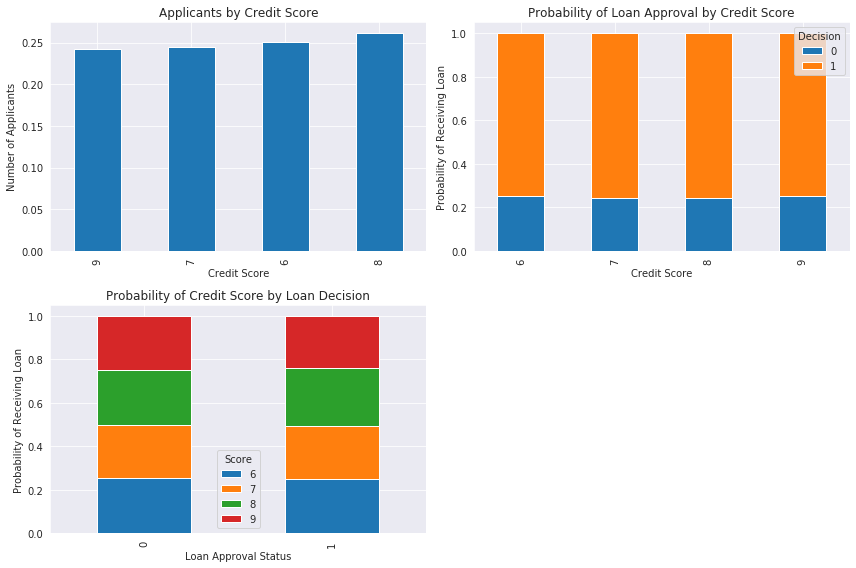

In [ ]:
# Visualising the above tables 

#PLOT 1: Number of Applicants grouped by Credit Score
with sns.axes_style('darkgrid'):    
    fig = plt.figure(figsize = (12,8))  
    ax1 = fig.add_subplot(221)         
    temp1.plot(kind = 'bar', ax = ax1)
    ax1.set_xlabel('Credit Score')      
    ax1.set_ylabel('Number of Applicants')
    ax1.set_title('Applicants by Credit Score')

#PLOT 2: Probability of receiving Loan by Credit Score
with sns.axes_style('darkgrid'):
    ax2 = fig.add_subplot(222)  
    temp2.plot(kind = "bar", stacked = True, ax = ax2) 
    ax2.set_xlabel('Credit Score') 
    ax2.set_ylabel('Probability of Receiving Loan')
    ax2.set_title('Probability of Loan Approval by Credit Score')
    
#PlOT 3: Probability of Credit Score by Loan Status
with sns.axes_style('darkgrid'):
    ax3 = fig.add_subplot(223)  
    temp2b.plot(kind = "bar", stacked = True, ax = ax3) 
    ax3.set_xlabel('Loan Approval Status') 
    ax3.set_ylabel('Probability of Receiving Loan')
    ax3.set_title('Probability of Credit Score by Loan Decision')

plt.tight_layout()

##### The above tables/graphs reveal some important insights about the Credit Score.

- All applicants have a similar proportionate of credit scores which is around **25%**.This happens because all applicants have similar distribution of credit scores.

- All Credit Scores have similar approval and rejection rate which is around **75%** and **25%** respectively.

- All approval and rejection of loans have the same probability of having a particular credit score which is around **25%**


### Analysis Based on Loan Decision

Decision           Accept    Reject
Employment_Type                    
Fresh_Graduate   0.741818  0.258182
Self_Employed    0.730000  0.270000
employee         0.761667  0.238333
employer         0.735000  0.265000
government       0.797500  0.202500


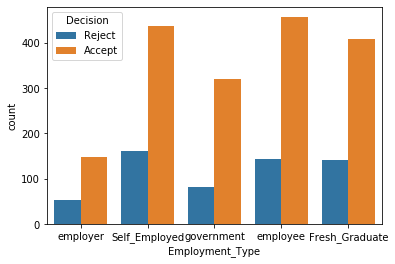

In [ ]:
print
temp3 = pd.crosstab(index = df2['Employment_Type'],columns = df2['Decision'],normalize = 'index')
print (temp3)

sns.countplot(x="Employment_Type", hue='Decision', data=df2)


- The countplot shows that applicants who works in the goverment has a higher approval rate for loans.There is no significant difference in loan approval rates for the rest of the category.

Decision         Accept    Reject
Property_Type                    
bungalow       0.754902  0.245098
condominium    0.753984  0.246016
flat           0.718750  0.281250
terrace        0.775862  0.224138
Decision             Accept    Reject
Credit_Card_types                    
gold               0.740798  0.259202
normal             0.749328  0.250672
platinum           0.814286  0.185714


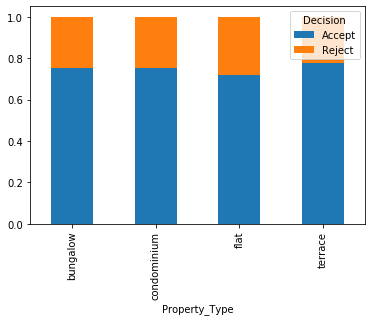

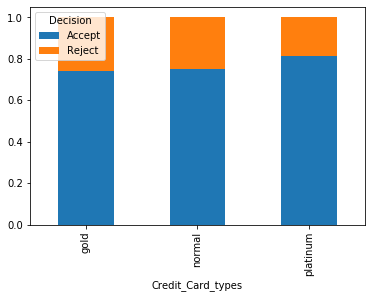

In [ ]:

print
temp4 = pd.crosstab(index = df2['Property_Type'],columns = df2['Decision'],normalize = 'index')
print (temp4)


print
temp4b = pd.crosstab(index = df2['Credit_Card_types'],columns = df2['Decision'],normalize = 'index')
print (temp4b)


# Probability of Loan Approval and Rejection by Property Type
temp4.plot(kind = 'bar', stacked = True)
plt.show()

# Loan Approval and Rejection by Credit Card type

temp4b.plot(kind = 'bar', stacked = True)
plt.show()

##### The above tables/graphs reveal some important insights about Loan approvals and rejections.

- The probability of receiving a loan by Property Type is nearly similar for all the Property Type in the dataset except flat which has slightly higher rejection rate (28%) .
- The probability of receiving a loan by Credit Card Type is nearly similar for gold and normal. (Approval : 74% Rejection : 25%). Platinum card however has higher approval rate and lower rejection rate. (Approval : 81% Rejection : 18%). This shows that applicants with Platinum card has higher change of getting their loan accepted compared to applicants with Gold and Normal card.

### Analysis Based on Income

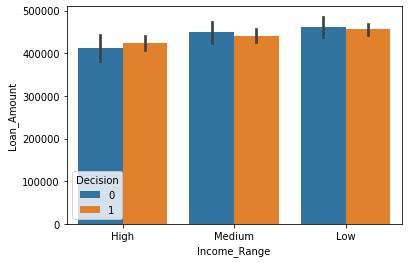

In [ ]:
monthly_salary_quantile = list(df['Monthly_Salary'].quantile([0.25,0.5,0.75]))

def salary_group(x):
    if x>=monthly_salary_quantile[2]:
        return "High"
    elif x>=monthly_salary_quantile[1]:
        return "Medium"
    else:
        return "Low"
df['Income_Range'] = df['Monthly_Salary'].apply(lambda x: salary_group(x))

sns.barplot(x='Income_Range',y="Loan_Amount", hue='Decision',data=df)



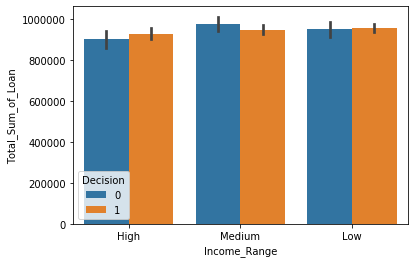

In [ ]:
sns.barplot(x='Income_Range',y="Total_Sum_of_Loan", hue='Decision',data=df)


##### The above tables/graphs reveal some important insights about personal Income.
   - Applicants in the medium and low income range applied for a higher amount of loan compared to applicants with high income. They also have higher amount of total sum of loan compared to applicants in high income range.This could be due to applicabts taking higher amount of loan to cover their expenses as they cannot cover it with their initial savings.
     
   - Applicants in the medium and low range has a higher rejection rate than acceptance rate for loan approval. This could be the result of inability to pay back the loan due to having a medium income range and a high loan amount in hand to pay back.
    
   - Applicants in the high income range has higher acceptance rate than rejection rate. They also loan lesser than people of medium and low income range.Applicants in the high income range has ability to payback loan faster and have capability to pay a higher initial amount for their expenses

### Results for XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV


xgb_model = XGBClassifier()
optimization_dict = {'max_depth': [2,4,6],
                      'n_estimators': [50,100,200],
                     'base_score': [0.5,0.7,0.9],
                     "random_state":[3]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
    
xgb = GridSearchCV(xgb_model, optimization_dict,scoring='accuracy', verbose=1,cv=5)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred)

print("Accuracy on test set:" ,format(xgb.score(X_test, y_test)))
print("AUC:",format(roc_auc_score(y_test, y_pred)))

confusion_majority=confusion_matrix(y_test, y_pred)

print('Majority classifier Confusion Matrix\n', confusion_majority)
print('***')
print('Majority TN= ', confusion_majority[0][0])
print('Majority FP=', confusion_majority[0][1])
print('Majority FN= ', confusion_majority[1][0])
print('Majority TP= ', confusion_majority[1][1])
print('***')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   22.9s finished


Accuracy on test set: 0.7911111111111111
AUC: 0.7888805966460899
Majority classifier Confusion Matrix
 [[311 126]
 [ 62 401]]
***
Majority TN=  311
Majority FP= 126
Majority FN=  62
Majority TP=  401
***
Precision= 0.76
Recall= 0.87
F1= 0.81
Accuracy= 0.79


### Results for Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
param_grid = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None],
    "random_state":[7]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

rfcm = GridSearchCV(rfc, param_grid, 
                      scoring='accuracy', verbose=1,cv=5)
rfcm.fit(X_train, y_train)
y_pred = rfcm.predict(X_test)
fpr_rfcm, tpr_rfcm, thresholds_rfcm = roc_curve(y_test, y_pred)

print("Accuracy on test set:" ,format(rfcm.score(X_test, y_test)))
print("AUC:",format(roc_auc_score(y_test, y_pred)))

confusion_majority=confusion_matrix(y_test, y_pred)

print('Majority classifier Confusion Matrix\n', confusion_majority)
print('***')
print('Majority TN= ', confusion_majority[0][0])
print('Majority FP=', confusion_majority[0][1])
print('Majority FN= ', confusion_majority[1][0])
print('Majority TP= ', confusion_majority[1][1])
print('***')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   44.7s finished


Accuracy on test set: 0.8066666666666666
AUC: 0.8035496290731525
Majority classifier Confusion Matrix
 [[304 133]
 [ 41 422]]
***
Majority TN=  304
Majority FP= 133
Majority FN=  41
Majority TP=  422
***
Precision= 0.76
Recall= 0.91
F1= 0.83
Accuracy= 0.81


### Results for Linear Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

lr_model = LogisticRegression()
param_grid = {'tol': [0.01, 0.001, 0.0001],
              'max_iter': [100, 150, 200]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

lrm = GridSearchCV(lr_model, param_grid, 
                      scoring='accuracy', verbose=1,cv=5)

lrm.fit(X_train, y_train)
y_pred = lrm.predict(X_test)
fpr_lrm, tpr_lrm, thresholds_lrm = roc_curve(y_test, y_pred)

print("Accuracy on test set:" ,format(lrm.score(X_test, y_test)))
print("AUC:",format(roc_auc_score(y_test, y_pred)))

confusion_majority=confusion_matrix(y_test, y_pred)

print('Majority classifier Confusion Matrix\n', confusion_majority)
print('***')
print('Majority TN= ', confusion_majority[0][0])
print('Majority FP=', confusion_majority[0][1])
print('Majority FN= ', confusion_majority[1][0])
print('Majority TP= ', confusion_majority[1][1])
print('***')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on test set: 0.5022222222222222
AUC: 0.514399671824881
Majority classifier Confusion Matrix
 [[409  28]
 [420  43]]
***
Majority TN=  409
Majority FP= 28
Majority FN=  420
Majority TP=  43
***
Precision= 0.61
Recall= 0.09
F1= 0.16
Accuracy= 0.50


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.1s finished


### Results for k-NN Classification

In [ ]:
knn_model = KNeighborsClassifier()
param_grid = { 'n_neighbors': [3, 5, 7, 9, 11]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

knn = GridSearchCV(knn_model, param_grid,scoring='accuracy', verbose=1,cv=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred)

print("Accuracy on test set:" ,format(knn.score(X_test, y_test)))
print("AUC:",format(roc_auc_score(y_test, y_pred)))

confusion_majority=confusion_matrix(y_test, y_pred)

print('Majority classifier Confusion Matrix\n', confusion_majority)
print('***')
print('Majority TN= ', confusion_majority[0][0])
print('Majority FP=', confusion_majority[0][1])
print('Majority FN= ', confusion_majority[1][0])
print('Majority TP= ', confusion_majority[1][1])
print('***')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy on test set: 0.6555555555555556
AUC: 0.6600224384795212
Majority classifier Confusion Matrix
 [[356  81]
 [229 234]]
***
Majority TN=  356
Majority FP= 81
Majority FN=  229
Majority TP=  234
***
Precision= 0.74
Recall= 0.51
F1= 0.60
Accuracy= 0.66


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.9s finished


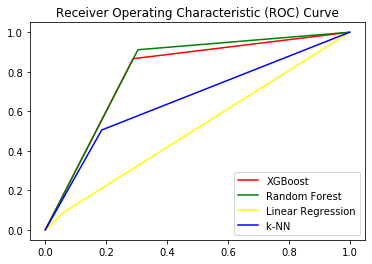

In [ ]:
plt.plot(fpr_xgb, tpr_xgb, color="red", label="XGBoost")
plt.plot(fpr_rfcm, tpr_rfcm, color="green", label="Random Forest")
plt.plot(fpr_lrm, tpr_lrm, color="yellow", label="Linear Regression")
plt.plot(fpr_knn, tpr_knn, color="blue", label="k-NN ")
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()